<img src='files/exeter_logo_grey.png' width=500 height=500 />

<p class='alert alert-success' style='font-size:30px;text-align:center;'>
    Covid-19 UK Mobility Project - Trips' Duration
</p>

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from aux_functions import *

%load_ext autoreload
%autoreload 2

In [2]:
COLORS = ['#ff5d8f', '#595959']
trips = pd.read_csv("files/norm_trips_len_complete_all.csv")
trips['duration'] = np.abs(trips.hour_home - trips.hour_leave)
trips = trips.groupby(['year', 'week', 'geo_code', 'hour_leave']).mean().reset_index()
trips['Pandemic'] = trips.apply(lambda x: 'During' if (x.year>2019 and x.week>10) else "Before", axis=1)

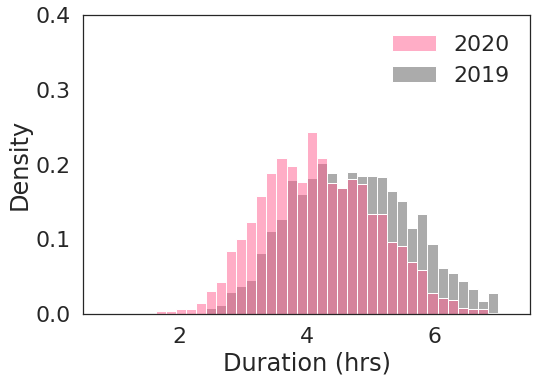

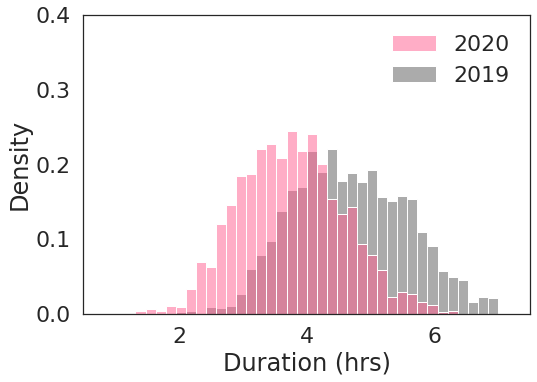

In [3]:
for w in [8, 13]:
    sns.set(font_scale=2)
    sns.set_style('white')
    trips_filtered_nw = trips[(trips.hour_leave.isin(range(10, 16))) & (trips.week==w)]
    ax = sns.histplot(data=trips_filtered_nw[(trips_filtered_nw.year<2021)], x="duration", hue="year", 
                      stat='density', palette=COLORS, hue_order=[2020, 2019])
    sns.move_legend(ax, "upper right", ncol=1, title=None, frameon=False,)
    plt.xlim([0.5, 7.5])
    plt.ylim([0, 0.4])
    plt.xlabel("Duration (hrs)")
#     ax.get_legend().remove()
    plt.savefig("figures/duration_trips_others_week_{}.svg".format(w), transparent=True)
    plt.show()

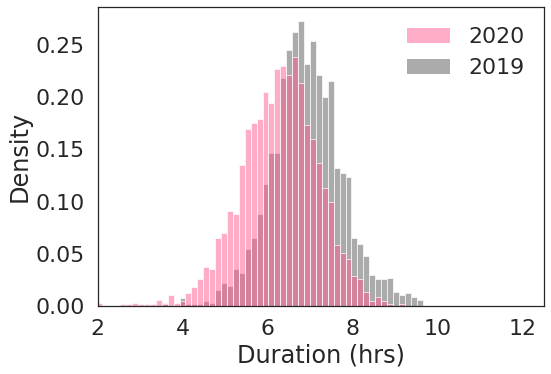

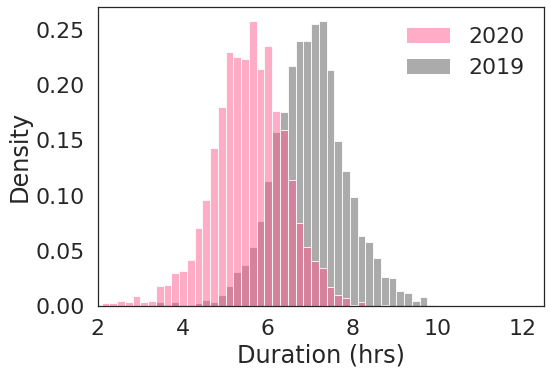

In [4]:
for w in [8, 13]:
    sns.set(font_scale=2)
    sns.set_style('white')
    trips_filtered_w = trips[(trips.hour_leave.isin(range(4, 10))) & (trips.week==w)]
    ax = sns.histplot(data=trips_filtered_w[(trips_filtered_w.year<2021)], x="duration", 
                      hue="year", stat='density', palette=COLORS, hue_order=[2020, 2019])
    sns.move_legend(ax, "upper right", ncol=1, title=None, frameon=False,)
    plt.xlim([2, 12.5])
#     plt.ylim([0, 0.2])
#     ax.get_legend().remove()
    plt.xlabel("Duration (hrs)")
    plt.savefig("figures/duration_trip_work_week_{}.svg".format(w), transparent=True)
    plt.show()

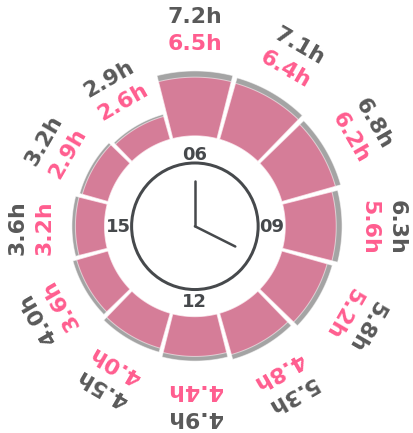

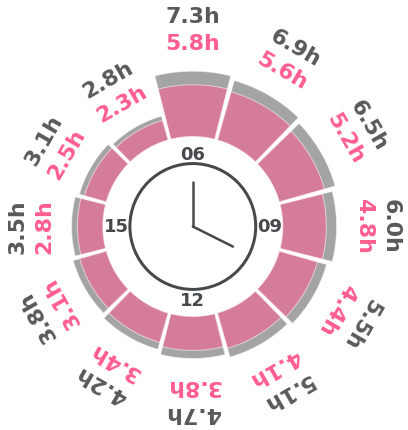

In [5]:
for w in [8, 15]:
    hours = list(range(6, 18))
    df_20 = trips[(trips.year==2020) & (trips.week==w) & (trips.hour_leave.isin(hours))].groupby(['hour_leave']).mean()["duration"]
    df_19 = trips[(trips.year==2019) & (trips.week==w) & (trips.hour_leave.isin(hours))].groupby(['hour_leave']).mean()["duration"]
    fname = "figures/clock_trips_before_w{}.svg".format(w)
    plot_clock_diff1(df_19, df_20, fname, hours)

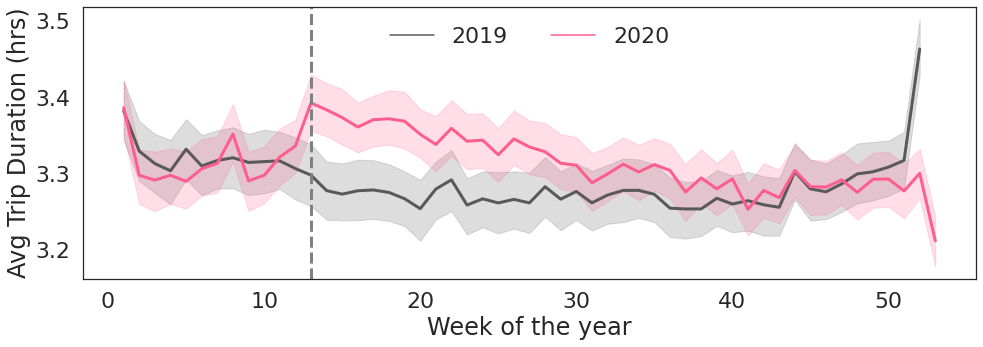

In [6]:
sns.set(font_scale=2)
sns.set_style('white')
f, ax = plt.subplots(1, figsize=(16, 5)) 
data = trips[(trips.year<2021) & (trips.duration<6)]
sns.lineplot(data=data, x="week", y="duration", linewidth=3, hue="year", palette=COLORS[::-1])
plt.axvline(x=13,linestyle='dashed',lw=3,color='grey',label='1st Lockdown')
plt.xlabel("Week of the year")
plt.ylabel("Avg Trip Duration (hrs)")
sns.move_legend(ax, "upper center", ncol=2, title=None, frameon=False,)
# ax.get_legend().remove()
plt.savefig("figures/duration_less_6hrs.svg".format(w), transparent=True)
plt.show()

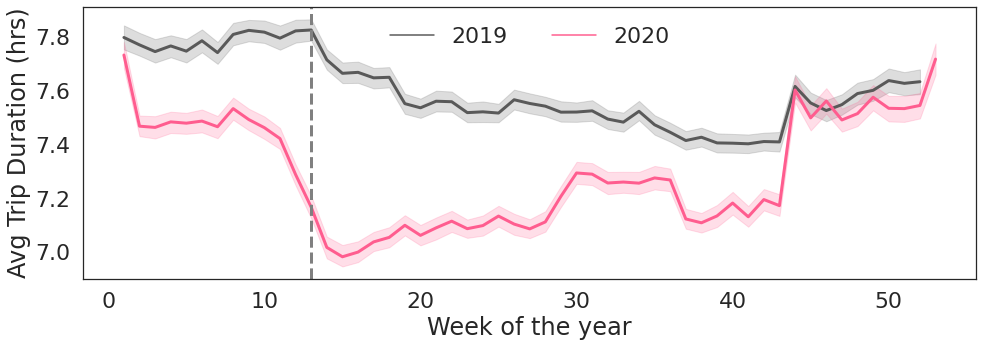

In [7]:
sns.set(font_scale=2)
sns.set_style('white')
f, ax = plt.subplots(1, figsize=(16, 5)) 
data = trips[(trips.year<2021) & (trips.duration>=6)]
sns.lineplot(data=data, x="week", y="duration", linewidth=3, hue="year", palette=COLORS[::-1])
plt.axvline(x=13,linestyle='dashed',lw=3,color='grey',label='1st Lockdown')
plt.xlabel("Week of the year")
plt.ylabel("Avg Trip Duration (hrs)")
sns.move_legend(ax, "upper center", ncol=2, title=None, frameon=False,)
# ax.get_legend().remove()
plt.savefig("figures/duration_more_6hrs.svg".format(w), transparent=True)
plt.show()

In [8]:
colors_ru = ['#00a3f1','#595959', '#f5d200']
urban_rural_df = pd.read_csv('files/RUC11_LAD11_ENG.csv')
trips_ur = trips.merge(urban_rural_df[['geo_code', 'RUC11CD']], on='geo_code')
trips_ur.RUC11CD = trips_ur.RUC11CD.astype(int)
trips_ur['NRUC11'] = trips_ur.RUC11CD.apply(lambda x: get_new_ru_text(x))
trips_ur

,year,week,geo_code,hour_leave,month,day,hour_home,pigns,users,duration,Pandemic,RUC11CD,NRUC11
0,2019,1,E06000001,0,2.951613,8.338710,9.387097,82.497688,4.217742,9.387097,Before,4,Urban
1,2019,1,E06000001,1,2.512500,7.162500,9.875000,104.262083,2.175000,8.875000,Before,4,Urban
2,2019,1,E06000001,2,2.262295,6.557377,10.016393,103.391803,1.540984,8.016393,Before,4,Urban
3,2019,1,E06000001,3,2.540000,7.280000,9.920000,77.138333,1.420000,6.920000,Before,4,Urban
4,2019,1,E06000001,4,2.073171,6.097561,10.634146,107.272358,1.439024,6.634146,Before,4,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...
880707,2021,53,E41000324,17,1.000000,1.714286,19.428571,25.916667,3.571429,2.428571,During,6,Urban
880708,2021,53,E41000324,18,1.000000,1.857143,20.285714,13.047619,1.857143,2.285714,During,6,Urban
880709,2021,53,E41000324,19,1.000000,2.000000,21.333333,9.250000,1.333333,2.333333,During,6,Urban
880710,2021,53,E41000324,20,1.000000,1.750000,21.500000,32.562500,1.750000,1.500000,During,6,Urban


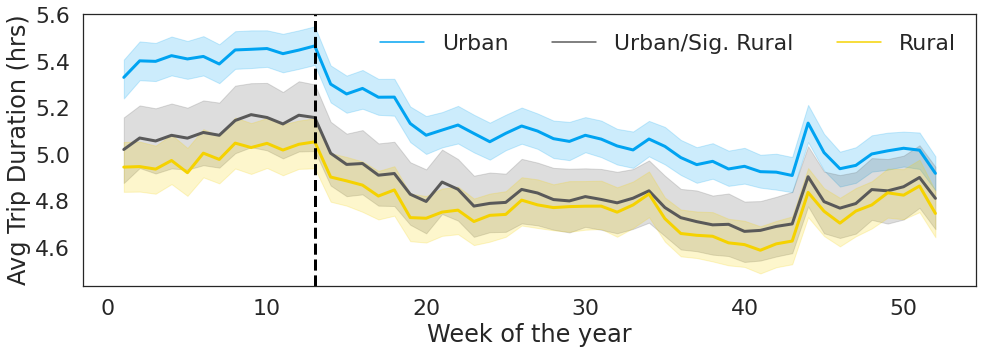

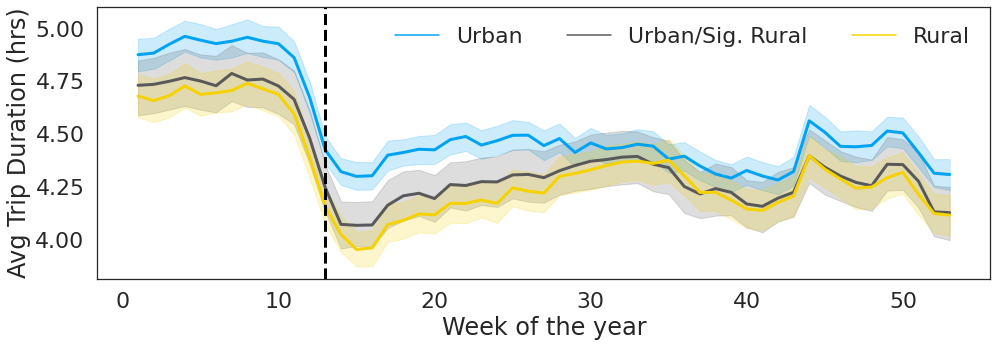

In [9]:
for y in [2019, 2020]:
    sns.set(font_scale=2)
    sns.set_style('white')
    f, ax = plt.subplots(1, figsize=(16, 5))
    sns.lineplot(data=trips_ur[trips_ur.year==y], x="week", y="duration", hue='NRUC11', linewidth=3, palette=colors_ru)
    plt.axvline(x=13,linestyle='dashed',lw=3,color='black',label='1st Lockdown')
    plt.xlabel("Week of the year")
    plt.ylabel("Avg Trip Duration (hrs)")
    sns.move_legend(ax, "upper right", ncol=3, title=None, frameon=False,)
    plt.savefig("figures/duration_ru_{}.svg".format(y), transparent=True)
    plt.show()

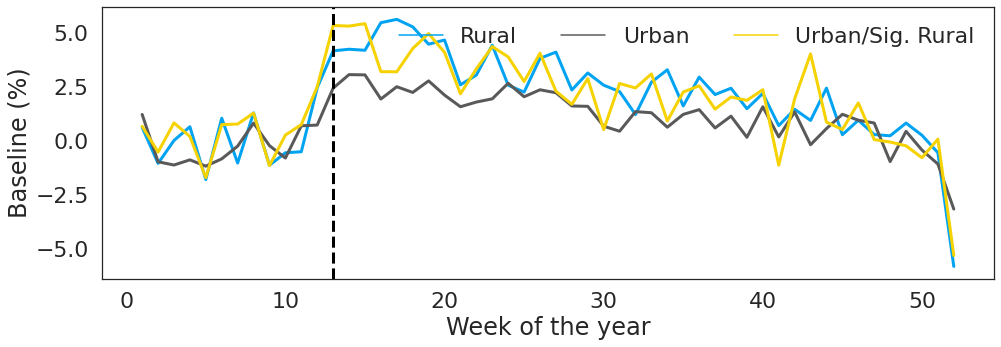

In [10]:
trips_ur_less = trips_ur[trips_ur.duration<6].groupby(['NRUC11', 'year','week']).mean().reset_index()
df_diff = trips_ur_less[(trips_ur_less.year==2019)]
df_20 = trips_ur_less[(trips_ur_less.year==2020) & (trips_ur_less.week<53)]   
df_diff['duration_diff'] = (df_diff.duration.values - df_20.duration.values)/df_diff.duration.values
df_diff["duration_perc"] = df_diff["duration_diff"].apply(aux_func)

sns.set(font_scale=2)
sns.set_style('white')
f, ax = plt.subplots(1, figsize=(16, 5))
sns.lineplot(data=df_diff, x="week", y="duration_perc", hue='NRUC11', linewidth=3, palette=colors_ru)
plt.axvline(x=13,linestyle='dashed',lw=3,color='black',label='1st Lockdown')
plt.xlabel("Week of the year")
plt.ylabel("Baseline (%)")
sns.move_legend(ax, "upper right", ncol=3, title=None, frameon=False,)
plt.savefig("figures/duration_ru_diff_less_6.svg", transparent=True)
plt.show()

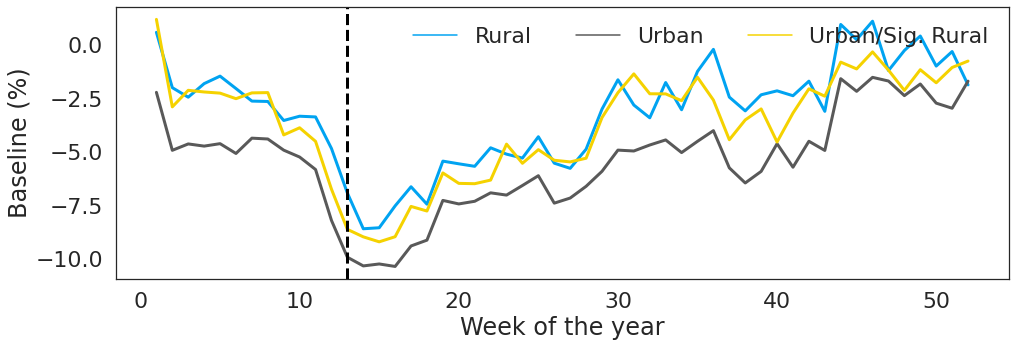

In [11]:
trips_ur_more = trips_ur[trips_ur.duration>=6].groupby(['NRUC11', 'year','week']).mean().reset_index()
df_diff = trips_ur_more[(trips_ur_more.year==2019)]
df_20 = trips_ur_more[(trips_ur_more.year==2020) & (trips_ur_more.week<53)]   
df_diff['duration_diff'] = (df_diff.duration.values - df_20.duration.values)/df_diff.duration.values
df_diff["duration_perc"] = df_diff["duration_diff"].apply(aux_func)

sns.set(font_scale=2)
sns.set_style('white')
f, ax = plt.subplots(1, figsize=(16, 5))
sns.lineplot(data=df_diff, x="week", y="duration_perc", hue='NRUC11', linewidth=3, palette=colors_ru)
plt.axvline(x=13,linestyle='dashed',lw=3,color='black',label='1st Lockdown')
plt.xlabel("Week of the year")
plt.ylabel("Baseline (%)")
sns.move_legend(ax, "upper right", ncol=3, title=None, frameon=False,)
plt.savefig("figures/duration_ru_diff_more_6.svg", transparent=True)
plt.show()

In [12]:
cols_sec = ['ns_sec_1_perc', 'ns_sec_2_perc', 'ns_sec_6_perc', 'ns_sec_7_perc']
new_names = ['Higher Managerial', 'Lower Managerial', 'Small Employers', 'Semi-Routine Ocupations', 'Routine Ocupations']
cols_group = ['year', 'week', 'biggest_ns_sec', 'duration']
weeks_events = [8, 15]

trip_socio_hour = []
trips_soc = load_income_density_socio_data(trips)

for y in [2019, 2020]:
    if len(trip_socio_hour) == 0:
        trip_socio_hour = trips_soc[(trips_soc.year==y) &
                                    (trips_soc.hour_leave.isin(range(4, 10))) &
                                    (trips_soc.week==8) &
                                    (trips_soc.biggest_ns_sec.isin(cols_sec))][cols_group].reset_index()
        trip_socio_hour.rename(columns={"duration": f"{y}_8"}, inplace=True)
        
        temp = trips_soc[(trips_soc.year==y) &
                         (trips_soc.hour_leave.isin(range(4, 10))) &
                         (trips_soc.week==13) &
                         (trips_soc.biggest_ns_sec.isin(cols_sec))][cols_group].reset_index()
        temp.rename(columns={"duration": f"{y}_15"}, inplace=True)
        trip_socio_hour = pd.concat([trip_socio_hour, temp], axis=0, ignore_index=True)
        
    else:
        temp = trips_soc[(trips_soc.year==y) &
                         (trips_soc.hour_leave.isin(range(4, 10))) &
                         (trips_soc.week==8) &
                         (trips_soc.biggest_ns_sec.isin(cols_sec))][cols_group].reset_index()
        temp.rename(columns={"duration": f"{y}_8"}, inplace=True)
        trip_socio_hour = pd.concat([trip_socio_hour, temp], axis=0, ignore_index=True)
        
        temp = trips_soc[(trips_soc.year==y) &
                         (trips_soc.hour_leave.isin(range(4, 10))) &
                         (trips_soc.week==13) &
                         (trips_soc.biggest_ns_sec.isin(cols_sec))][cols_group].reset_index()
        temp.rename(columns={"duration": f"{y}_15"}, inplace=True)
        trip_socio_hour = pd.concat([trip_socio_hour, temp], axis=0, ignore_index=True)  

<Figure size 3040x2090 with 0 Axes>

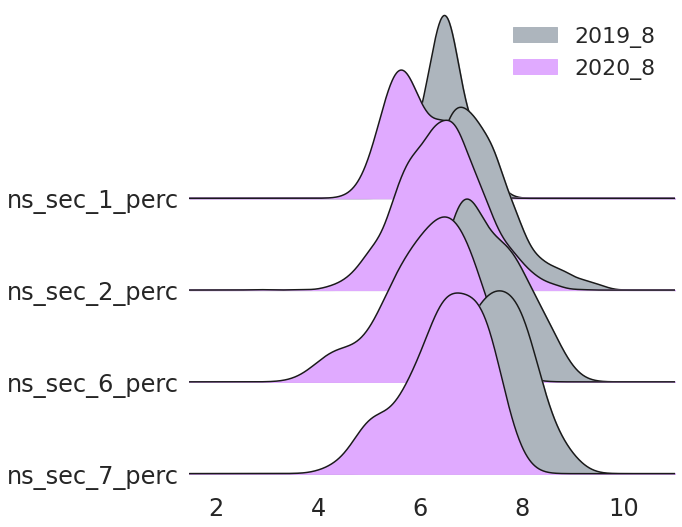

<Figure size 3040x2090 with 0 Axes>

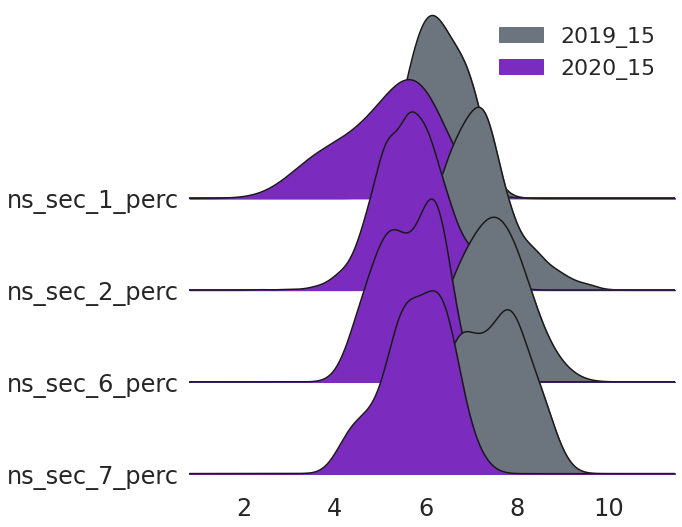

In [13]:
for w in [8, 13]:
    sns.set(font_scale=2)
    sns.set_style('white')
    plt.figure(dpi= 380)
    hours = list(trip_socio_hour.columns)[4:]
    data_ = trip_socio_hour[trip_socio_hour.week==w]
    fig, axes = joypy.joyplot(data_, column=hours, by="biggest_ns_sec", figsize=(10,8),
                              ylim='own', legend=True, alpha=1,
                              color=['#adb5bd', '#6c757d', '#e0aaff', '#7b2cbf'])
    plt.savefig(f"figures/dist_duration_sec_week_{w}.svg", transparent=True)

